<h1> Objective:- Assessment Task 1.3C: Image Histograms </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 2210470832 </b></div>

### 1. Calculating and plotting histograms of an image

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from math import log
img = cv.imread('img1.jpg')

###### i) Blue

In [2]:
hist_blue = cv.calcHist([img],[0],None,[256],[0,256]) #[0] for blue channel

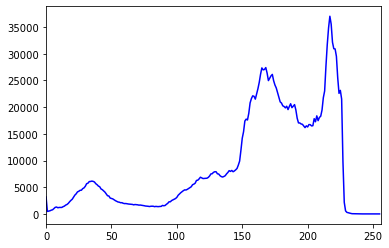

In [3]:
plt.plot(hist_blue, color = 'b')
plt.xlim([0,256])
plt.show()

###### ii) Red

In [4]:
hist_red = cv.calcHist([img],[1],None,[256],[0,256]) #[0] for red channel

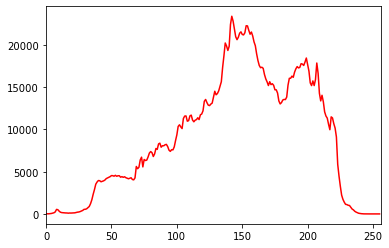

In [5]:
plt.plot(hist_red, color = 'r')
plt.xlim([0,256])
plt.show()

###### iii) Green

In [6]:
hist_green = cv.calcHist([img],[2],None,[256],[0,256]) #[0] for green channel

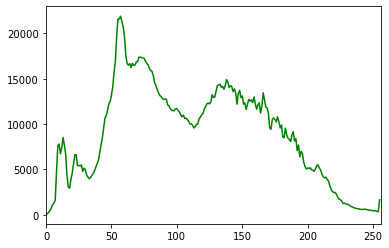

In [7]:
plt.plot(hist_green, color = 'g')
plt.xlim([0,256])
plt.show()

### 2. Histogram equalisation

In [8]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

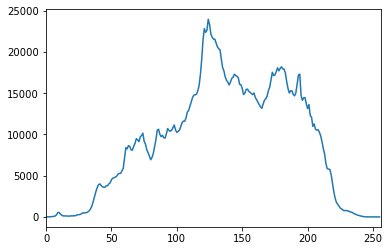

In [9]:
hist_gray = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist_gray)
plt.xlim([0,256])
plt.show() 

In [10]:
def getCumulativeDis(hist):
    c = [] #cumulative distribution
    s = 0
    for i in range(0, len(hist)):
        s = s + hist[i]
        c.append(s)
    return c 

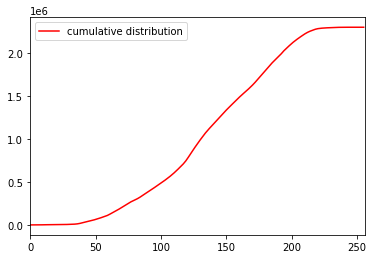

In [11]:
c = getCumulativeDis(hist_gray)
plt.plot(c, label = 'cumulative distribution', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.show()

In [12]:
img_equ = cv.equalizeHist(img_gray) 

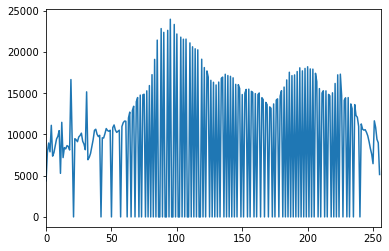

In [13]:
hist_equ = cv.calcHist([img_equ],[0],None,[256],[0,256])
plt.plot(hist_equ)
plt.xlim([0,256])`
plt.show() 

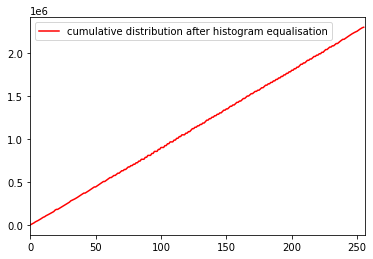

In [14]:
c_equ = getCumulativeDis(hist_equ)
plt.plot(c_equ, label = 'cumulative distribution after histogram equalisation', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.show() 

In [15]:
img_equalisation = np.hstack((img_gray, img_equ)) #stacking images side-by-side
cv.imwrite('img_equalisation.png', img_equalisation) #writing the stacked image to file

True

### Task 3 - Comparing images via their histograms

In [48]:
#Defining functions

def normalisation(hist):
    s=0
    for i in range(0, len(hist)):
        s=s+hist[i]
    for i in range(0, len(hist)):
        hist[i] = hist[i]/s
        
    return hist

def kl_divergence(h1, h2):
    h1 = h1 + 0.000001
    h2 = h2 + 0.000001
    return sum(h1[i] * log(h1[i]/h2[i]) for i in range(len(h1)))

def si_square(h1,h2):
    h1 = h1 + 0.000001
    h2 = h2 + 0.000001
    return sum((h1[i] - h2[i])**2/(h1[i]+h2[i]) for i in range(len(h1)))

In [49]:
#Loading images
img1 = cv.imread('img1.jpg')
img2 = cv.imread('img2.jpg')
img3 = cv.imread('img3.jpg')

#Convert into Gray image
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

#Calculate histogram
h1 = cv.calcHist([img1_gray],[0],None,[256],[0,256])
h2 = cv.calcHist([img2_gray],[0],None,[256],[0,256])
h3 = cv.calcHist([img3_gray],[0],None,[256],[0,256])

#Normalisation
h1_normalised = normalisation(h1)
h2_normalised = normalisation(h2)
h3_normalised = normalisation(h3)

#### i) KL Divergence

In [51]:
# calculate the kl divergence

#img1 vs img2
dist_img1_img2 = kl_divergence(h1_normalised, h2_normalised)
dist_img2_img1 = kl_divergence(h2_normalised, h1_normalised)

print('KL Divergence between image 1 and 2 is ', dist_img1_img2 + dist_img2_img1)

#img1 vs img3
dist_img1_img3 = kl_divergence(h1_normalised, h3_normalised)
dist_img3_img1 = kl_divergence(h3_normalised, h1_normalised)

print('KL Divergence between image 1 and 3 is ', dist_img1_img3 + dist_img3_img1)

#img2 vs img3
dist_img2_img3 = kl_divergence(h2_normalised, h3_normalised)
dist_img3_img2 = kl_divergence(h3_normalised, h2_normalised)

print('KL Divergence between image 2 and 3 is ', dist_img2_img3 + dist_img3_img2)

KL Divergence between image 1 and 2 is  [1.7330285]
KL Divergence between image 1 and 3 is  [1.6594003]
KL Divergence between image 2 and 3 is  [1.9058075]


### Conclusion : Based on KL Divergence image 1 and image 3 are most similar

#### ii) Si Square distance

In [52]:
#img1 vs img2
dist_img1_img2 = si_square(h1_normalised, h2_normalised)

print('Si square distance between image 1 and 2 is ', dist_img1_img2)

#img1 vs img3
dist_img1_img3 = si_square(h1_normalised, h3_normalised)

print('Si square distance between image 1 and 3 is ', dist_img1_img3)

#img2 vs img3
dist_img2_img3 = si_square(h2_normalised, h3_normalised)

print('Si square distance between image 2 and 3 is ', dist_img2_img3)

Si square distance between image 1 and 2 is  [0.68000305]
Si square distance between image 1 and 3 is  [0.6225393]
Si square distance between image 2 and 3 is  [0.36333728]


### Conclusion : Based on Si square distance between image 2 and image 3 are most similar